<a href="https://colab.research.google.com/github/BhagyaSri-1806/DataAnalyst/blob/main/PoliceKillings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [5]:
data = pd.read_csv('/content/PoliceKillingsUS.csv', encoding='latin-1')

In [8]:
data


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


In [9]:
data.head(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22.0,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35.0,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47.0,M,B,Knoxville,PA,False,attack,Not fleeing,False


In [10]:
# prompt: clean the data

# Check for missing values
print(data.isnull().sum())

# Fill missing values in 'age' with the median age
data['age'].fillna(data['age'].median(), inplace=True)

# Fill missing values in 'gender' with the mode
data['gender'].fillna(data['gender'].mode()[0], inplace=True)

# Fill missing values in 'race' with the mode
data['race'].fillna(data['race'].mode()[0], inplace=True)

# Fill missing values in 'city' with the mode
data['city'].fillna(data['city'].mode()[0], inplace=True)

# Remove rows with missing values in 'signs_of_mental_illness'
data.dropna(subset=['signs_of_mental_illness'], inplace=True)


# Remove rows with missing values in 'threat_level'
data.dropna(subset=['threat_level'], inplace=True)

# Remove rows with missing values in 'flee'
data.dropna(subset=['flee'], inplace=True)

# Remove rows with missing values in 'body_camera'
data.dropna(subset=['body_camera'], inplace=True)


# Convert 'age' to integer
data['age'] = data['age'].astype(int)

# Check for duplicates
print(data.duplicated().sum())

# Remove duplicates
data.drop_duplicates(inplace=True)

# Print the cleaned data
print(data.isnull().sum())
data.head(10)

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64
0
id                         0
name                       0
date                       0
manner_of_death            0
armed                      7
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64


<ipython-input-10-9a0d9156038f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace=True)
<ipython-input-10-9a0d9156038f>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False
5,11,Kenneth Joe Brown,04/01/15,shot,gun,18,M,W,Guthrie,OK,False,attack,Not fleeing,False
6,13,Kenneth Arnold Buck,05/01/15,shot,gun,22,M,H,Chandler,AZ,False,attack,Car,False
7,15,Brock Nichols,06/01/15,shot,gun,35,M,W,Assaria,KS,False,attack,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34,F,W,Burlington,IA,False,other,Not fleeing,True
9,17,Leslie Sapp III,06/01/15,shot,toy weapon,47,M,B,Knoxville,PA,False,attack,Not fleeing,False


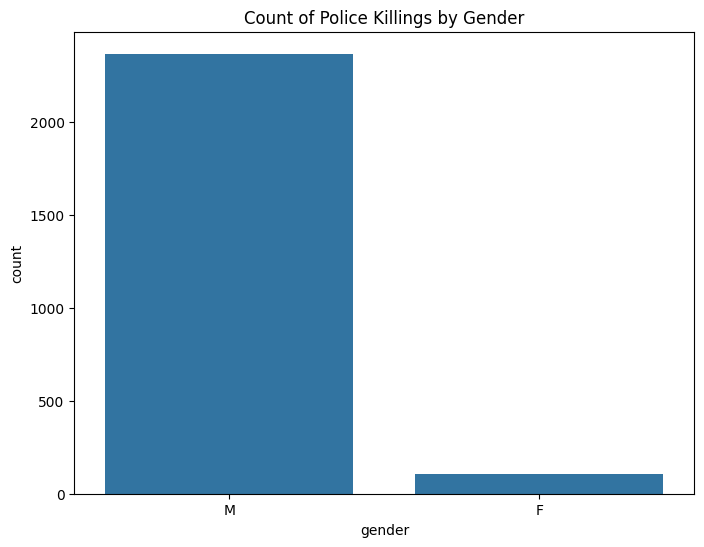

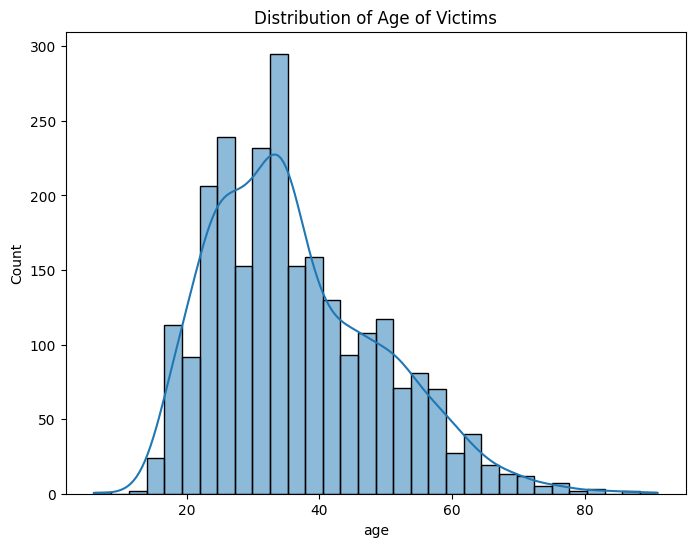

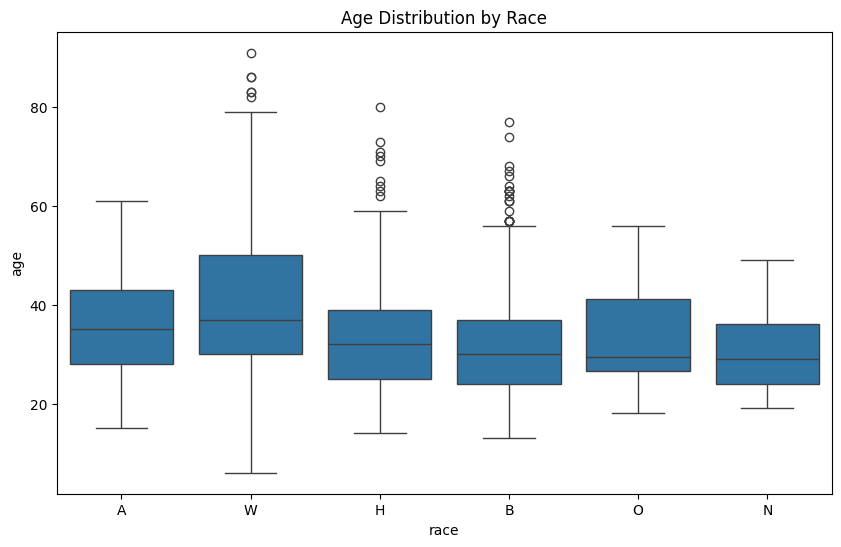

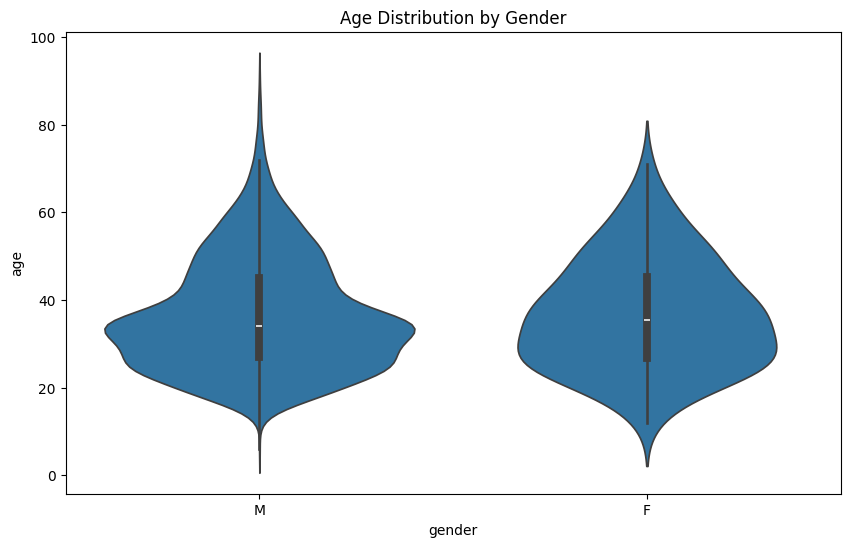

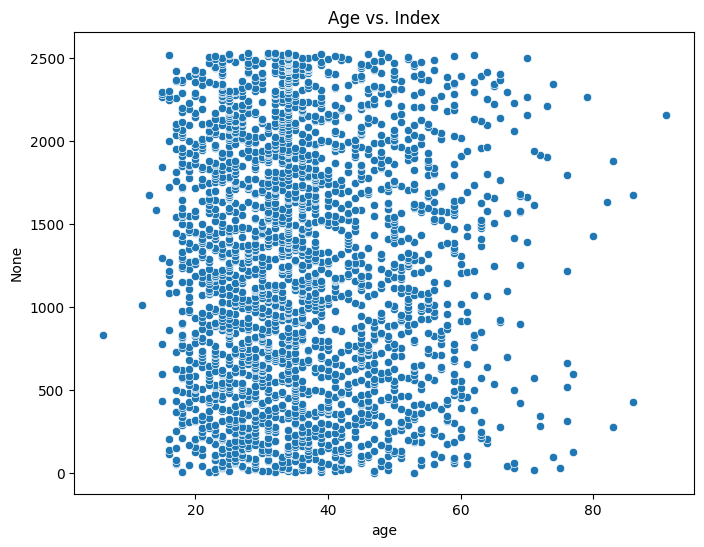

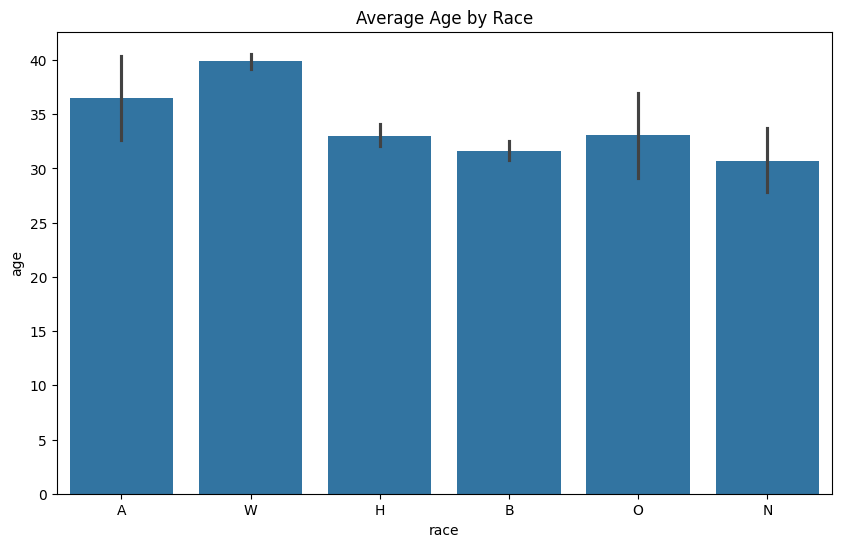

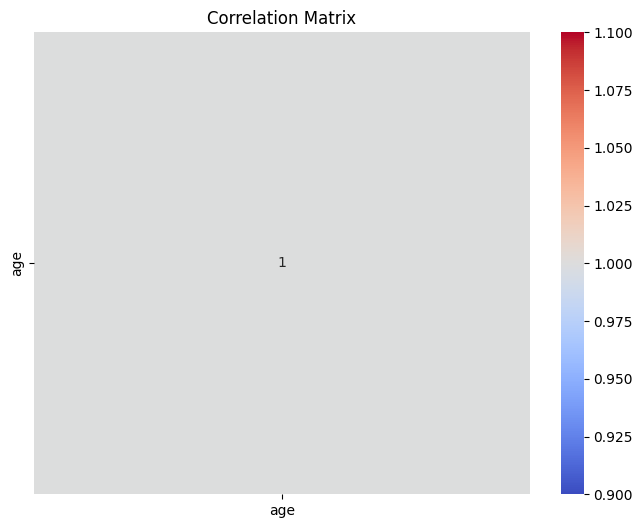

In [11]:
# prompt: 7 different types of graphs using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Countplot: Shows the counts of observations in each categorical bin using bars.
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data)
plt.title('Count of Police Killings by Gender')
plt.show()

# 2. Histogram: Shows the distribution of a numerical variable.
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True) # kde=True adds a kernel density estimate
plt.title('Distribution of Age of Victims')
plt.show()


# 3. Boxplot: Shows the distribution of a numerical variable for different categories.
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='age', data=data)
plt.title('Age Distribution by Race')
plt.show()


# 4. Violinplot: Similar to a boxplot, but shows the distribution of the data in more detail.
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='age', data=data)
plt.title('Age Distribution by Gender')
plt.show()


# 5. Scatterplot: Shows the relationship between two numerical variables.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y=data.index, data=data) # Using index for a simple scatter
plt.title('Age vs. Index')
plt.show()


# 6. Barplot: Shows the average value of a numerical variable for different categories.
plt.figure(figsize=(10, 6))
sns.barplot(x='race', y='age', data=data, estimator=np.mean)
plt.title('Average Age by Race')
plt.show()


# 7. Heatmap: Shows the correlation between multiple numerical variables.
plt.figure(figsize=(8, 6))
# Select numerical columns for correlation (example)
numerical_data = data[['age']]
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# prompt: explain the above code

This code performs data cleaning, exploratory data analysis (EDA) and visualization on a dataset about police killings in the US, likely from the file 'PoliceKillingsUS.csv'. Let's break down the code section by section:

**1. Data Loading and Initial Inspection:**

- It starts by importing necessary libraries: pandas for data manipulation, numpy for numerical operations, seaborn and matplotlib for data visualization.
- `pd.read_csv()` loads the data from the specified CSV file.  The `encoding='latin-1'` argument is crucial because the dataset might contain characters outside the standard UTF-8 encoding.
- `data.head(10)` displays the first 10 rows of the DataFrame, providing an initial view of the data.
- `data.isnull().sum()` checks for missing values (NaN) in each column and prints the counts.

**2. Data Cleaning:**

- **Missing Value Handling:**  The code addresses missing values in several columns using different strategies:
    - `fillna(data['age'].median(), inplace=True)`: Fills missing 'age' values with the median age of the dataset.  Using the median is generally better than the mean for potentially skewed age distributions.
    - `fillna(data['gender'].mode()[0], inplace=True)`: Replaces missing 'gender' values with the most frequent gender (mode).
    - Similar `fillna` operations are applied to 'race' and 'city' columns.
    - `dropna(subset=['column_name'], inplace=True)`: Removes rows with missing values in 'signs_of_mental_illness', 'threat_level', 'flee', and 'body_camera' columns.  This is a more aggressive approach and might lead to data loss. An alternative would be to impute these values if possible.

- **Data Type Conversion:**
    - `data['age'] = data['age'].astype(int)`: Converts the 'age' column to integer type, assuming it was initially a float.

- **Duplicate Removal:**
    - `print(data.duplicated().sum())`: Identifies and counts duplicate rows.
    - `data.drop_duplicates(inplace=True)`: Removes the duplicate rows.

- **Final Check:**
    - `print(data.isnull().sum())`: Checks if any missing values remain after cleaning.
    - `data.head(10)`: Displays the first 10 rows of the cleaned data.


**3. Data Visualization (EDA):**

The code uses seaborn to create various visualizations to understand the data's characteristics:

- **Countplot:** Shows the number of police killings by gender.
- **Histogram:** Visualizes the age distribution of the victims. `kde=True` adds a kernel density estimate line to show the distribution more smoothly.
- **Boxplot:** Compares the age distribution across different races.
- **Violinplot:** Similar to a boxplot but displays the distribution more clearly.
- **Scatterplot:** Shows a relationship (though not very informative here) between 'age' and the index of the data rows.  It's likely just showing age ordered by row number.
- **Barplot:** Shows the average age of victims for each race.
- **Heatmap:** Displays the correlation matrix for numerical columns.  In this specific instance, only 'age' is being considered, so the heatmap only contains a single value (the correlation of age with itself which is always 1). This part of the code might be intended for more numerical features.


**Overall:**

The script demonstrates basic data cleaning techniques and various visualization methods in Python. It is a good starting point for understanding the data.  However, some improvements could be made.


* **Imputation Alternatives**: Consider more sophisticated methods for imputing missing values, like KNN imputation, instead of simply dropping rows or filling with the mean/median/mode.  The impact of missing data should be investigated before simply removing data.
* **More Informative Visualizations**: The scatterplot is not very helpful in its current form.  More meaningful relationships between features should be explored.
* **Correlation of multiple variables**: The heatmap should include other numerical columns for better insight.
* **Statistical Tests**: Incorporate statistical tests to understand the significance of observed differences.


This enhanced analysis would provide a more in-depth understanding of the data.


SyntaxError: unterminated string literal (detected at line 3) (<ipython-input-13-97fb9c152c00>, line 3)

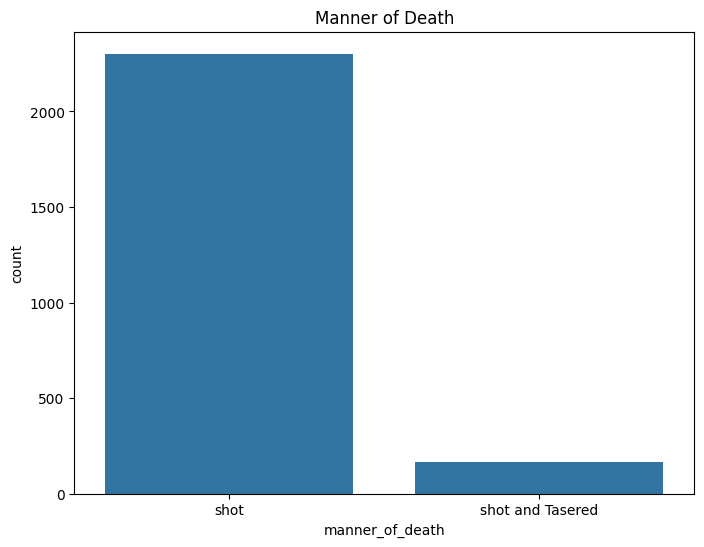

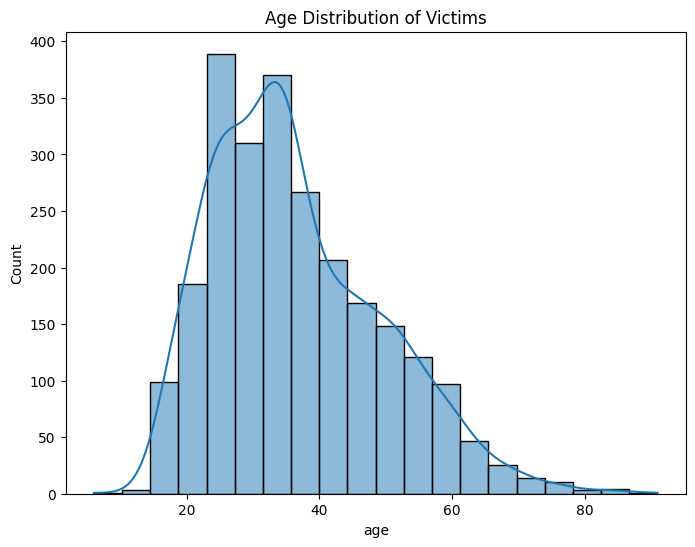

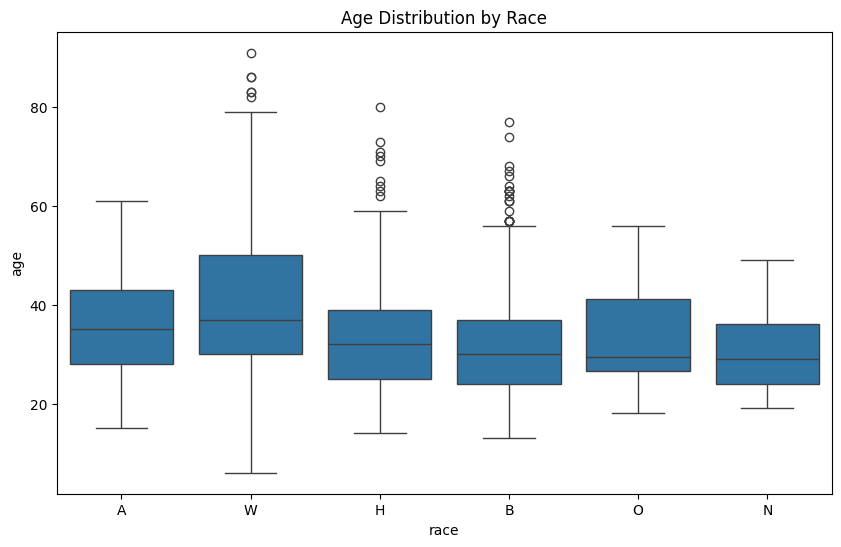

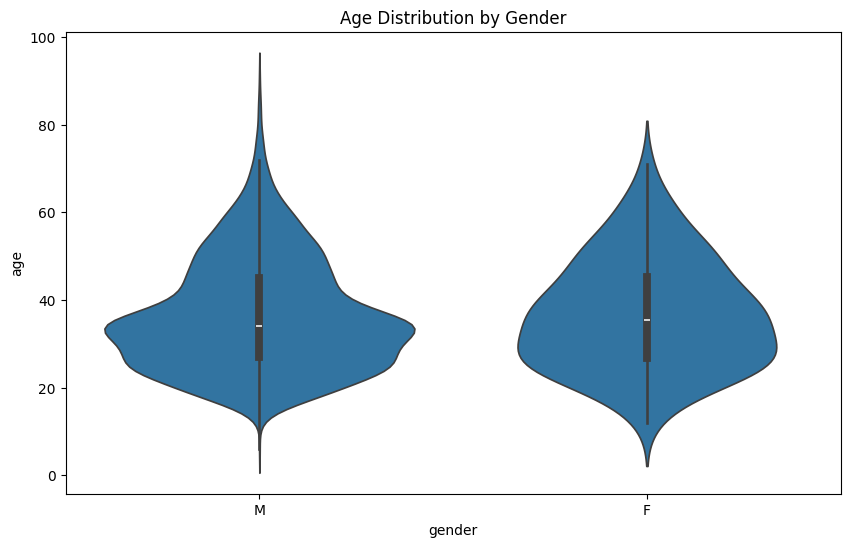

ValueError: Could not interpret value `year` for `y`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [15]:
# prompt: 7 different types of graphs using matplot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and cleaned as in the previous code

# 1. Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='manner_of_death', data=data)
plt.title('Manner of Death')
plt.show()

# 2. Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)  # Adjust bins for better visualization
plt.title('Age Distribution of Victims')
plt.show()


# 3. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='age', data=data)
plt.title('Age Distribution by Race')
plt.show()


# 4. Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='gender', y='age', data=data)
plt.title('Age Distribution by Gender')
plt.show()


# 5. Scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='year', data=data) # Use a more meaningful feature
plt.title('Age vs Year')
plt.show()

# 6. Barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='armed', y='age', data=data, estimator=np.mean)
plt.title('Average Age by Armed Status')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.show()


# 7. Pairplot (for multiple relationships)
numerical_cols = ['age', 'year'] # Add more numerical columns if needed
sns.pairplot(data[numerical_cols])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()